Análise de componentes principais (Principal Component Analysis - PCA)
Referência: https://en.wikipedia.org/wiki/Principal_component_analysis

---

PCA é um procedimento estatístico que usa transformação ortogonal para converter um conjunto de observações de variáveis possivelmente correlacionadas em um conjunto de valores de variáveis linearmente não correlacionadas chamadas componentes principais.

Se há $n$ observações com $p$ variáveis, então o número de componentes principais é o mínimo entre $n-1$ e $p$. Esta transformação é definida de maneira que a primeira componente principal tem a maior variância possível, ou seja, leva em conta a maior variabilidade possível dos dados, e cada componente sucessiva tem por sua vez a maior variância possível sub as restrições da transformação ortogonal das componentes restantes. 

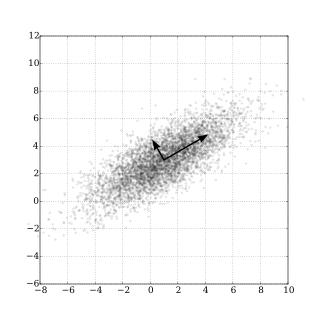
PCA de uma distribuição Gaussiana multivariada centrada em (1,3). Os vetores mostrados na figura são os autovetores da matriz de covariância normalizada pela raís do autovalor correspondente.

---

PCA é definido matematicamente como uma transformação ortogonal linear que transforma os dados para um novo sistema de coordenadas de modo que a maior variância da projeção fique sobe o primeiro eixo coordenado (primeira componente principal), a segunda maior variância sobe o segundo eixo principal, e assim por diante.

Considere a matriz de dados **X**, suas colunas têm média 0, e cada entrada das $n$ linhas representa uma observação diferente, e cada coluna representa um atributo das observações.

**Primeira Componente**

Para maximizar a variãncia, o vetor **W** precisa satisfazer:

$W_{(1)} = argmax \{ \frac{w^T X^T X w }{w^T w}\}$


**Demais Componentes**

A k-ésima componente pode ser encontrada subtraindo as primeiras componentes de **X**:

$\hat{X_k} = X - \sum_{s=1}^{k-1} X w_{(s)} w^T_{(s)}$
 
e encontrando o próximo vetor $W_{(k)}$ através da expressão:

$W_{(s)} = argmax \{ \frac{w^T \hat{X^T_k} \hat{X_k} w }{w^T w}\}$.


A matriz completa com a componentes principais para a decomposição de **X** é dada por:
$T=XW$,
onde **W** é uma matriz com $p$ linhas e $p$ colunas cujas colunas são os autovalores da matriz $X^TX$.

Exemplo do uso do PCA para redução de dimensionalidade de um conjunto de dados

Fonte: http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py



Atributos do conjunto de dados ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Razão de variância de cada componente principal: [0.92461621 0.05301557 0.01718514 0.00518309]

Reduzindo a dimensão de 4 para 2 atributos



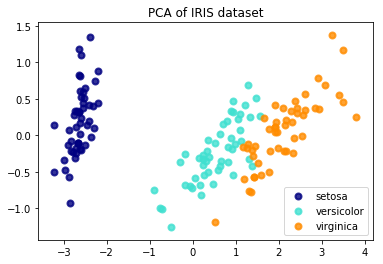


Plotando gráfico de dispersão 2 a 2 entre os 4 atributos



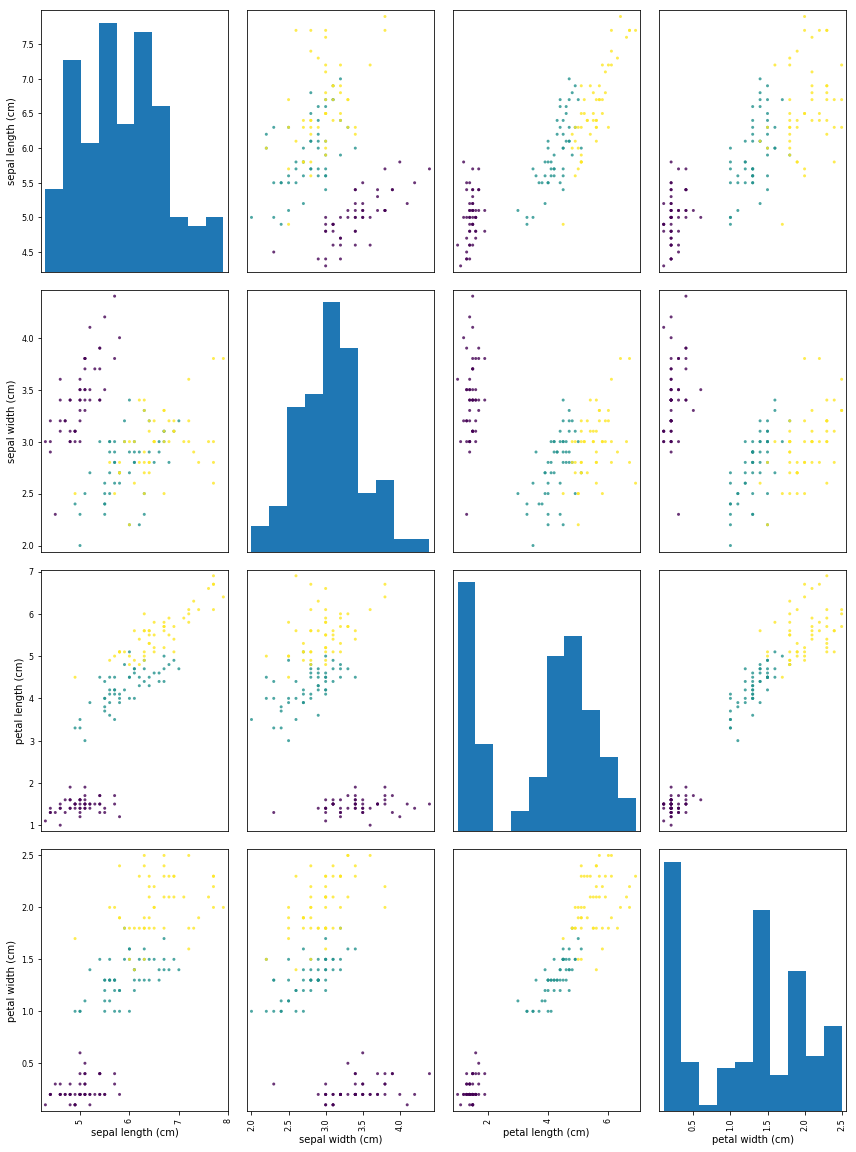

In [21]:


%matplotlib inline
#print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

print('Atributos do conjunto de dados %s\n'%(iris.feature_names))

# Percentage of variance explained for each components
print('Razão de variância de cada componente principal: %s\n'
      % str(pca.explained_variance_ratio_))


print('Reduzindo a dimensão de 4 para 2 atributos\n')

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()


print('\nPlotando gráfico de dispersão 2 a 2 entre os 4 atributos\n')

import pandas as pd


df = pd.DataFrame(iris.data, columns=iris.feature_names)
#axes = pd.tools.plotting.scater_matrix(df, alpha=0.2)
axes = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(12,16), c=y)#, cmap=mglearn.cm3)
plt.tight_layout()
#plt.savefig('scatter_matrix.png')
plt.show()
